<a href="https://colab.research.google.com/github/lionem2018/ML_B4E_homework/blob/main/3%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_Saza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install --upgrade imblearn

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")

def get_preprocessed_data(df):
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype('int')
  df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float64')
  df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
  df = df.drop('customerID', axis = 1, inplace = False)
  object_columns = df.dtypes[df.dtypes == 'object'].index.tolist()

  return df

def get_encoded_data(df, object_columns):
  encoder = LabelEncoder()

  for object_column in object_columns:
    df[object_column] = encoder.fit_transform(df[object_column])

  return df

def get_train_test_data(df, test_size=0.3):
  ftr_df = df.iloc[:, :-1]
  tgt_df = df.iloc[:, -1]

  ftr_train, ftr_test, tgt_train, tgt_test = train_test_split(ftr_df, tgt_df, test_size=test_size, random_state=0, stratify=tgt_df)

  print(ftr_train.shape, ftr_test.shape, tgt_train.shape, tgt_test.shape)

  return ftr_train, ftr_test, tgt_train, tgt_test

df_processed = get_preprocessed_data(df)
object_columns = df_processed.dtypes[df.dtypes == 'object'].index.tolist()
df_encoded = get_encoded_data(df_processed, object_columns)
ftr_train, ftr_test, tgt_train, tgt_test = get_train_test_data(df_encoded, test_size=0.3)

(4930, 19) (2113, 19) (4930,) (2113,)


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  F1 = f1_score(y_test, y_pred, average='macro')

  print("\n정확도: {:.4f}".format(accuracy))
  print("정밀도: {:.4f}".format(precision))
  print("재현율: {:.4f}".format(recall))
  print("F1: {:.4f}".format(F1))

####요구사항 1.XGBoost와 LightGBM을 각각 이용해여 학습 데이터로 학습을 테스트 데이터로 성능 평가를 수행합니다.

In [6]:
from xgboost import XGBClassifier

evals = [(ftr_test, tgt_test)]

xgb_wrapper = XGBClassifier(n_estimators=100)
xgb_wrapper.fit(ftr_train, tgt_train, eval_set=evals)

w_preds = xgb_wrapper.predict(ftr_test)

get_clf_eval(tgt_test, w_preds)

[0]	validation_0-error:0.223852
[1]	validation_0-error:0.207288
[2]	validation_0-error:0.210128
[3]	validation_0-error:0.202556
[4]	validation_0-error:0.203029
[5]	validation_0-error:0.200663
[6]	validation_0-error:0.203029
[7]	validation_0-error:0.204449
[8]	validation_0-error:0.204922
[9]	validation_0-error:0.203975
[10]	validation_0-error:0.203975
[11]	validation_0-error:0.202556
[12]	validation_0-error:0.203029
[13]	validation_0-error:0.202556
[14]	validation_0-error:0.202082
[15]	validation_0-error:0.204449
[16]	validation_0-error:0.203502
[17]	validation_0-error:0.203502
[18]	validation_0-error:0.204449
[19]	validation_0-error:0.204449
[20]	validation_0-error:0.203029
[21]	validation_0-error:0.200663
[22]	validation_0-error:0.204449
[23]	validation_0-error:0.203975
[24]	validation_0-error:0.201136
[25]	validation_0-error:0.203029
[26]	validation_0-error:0.204922
[27]	validation_0-error:0.203502
[28]	validation_0-error:0.203029
[29]	validation_0-error:0.202556
[30]	validation_0-er

In [7]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100)
lgbm_wrapper.fit(ftr_train, tgt_train, eval_set=evals)

lgbm_preds = lgbm_wrapper.predict(ftr_test)

get_clf_eval(tgt_test, lgbm_preds)

[1]	valid_0's binary_logloss: 0.550007
[2]	valid_0's binary_logloss: 0.527781
[3]	valid_0's binary_logloss: 0.509902
[4]	valid_0's binary_logloss: 0.495336
[5]	valid_0's binary_logloss: 0.483477
[6]	valid_0's binary_logloss: 0.472685
[7]	valid_0's binary_logloss: 0.464412
[8]	valid_0's binary_logloss: 0.457062
[9]	valid_0's binary_logloss: 0.451367
[10]	valid_0's binary_logloss: 0.446458
[11]	valid_0's binary_logloss: 0.442407
[12]	valid_0's binary_logloss: 0.438658
[13]	valid_0's binary_logloss: 0.435501
[14]	valid_0's binary_logloss: 0.432648
[15]	valid_0's binary_logloss: 0.430412
[16]	valid_0's binary_logloss: 0.428856
[17]	valid_0's binary_logloss: 0.427193
[18]	valid_0's binary_logloss: 0.426199
[19]	valid_0's binary_logloss: 0.424275
[20]	valid_0's binary_logloss: 0.422988
[21]	valid_0's binary_logloss: 0.422297
[22]	valid_0's binary_logloss: 0.42161
[23]	valid_0's binary_logloss: 0.421109
[24]	valid_0's binary_logloss: 0.420421
[25]	valid_0's binary_logloss: 0.420816
[26]	valid

#### 요구사항2. 기존 학습 데이터를 다시 학습과 검증 데이터로 분리한 후 LightGBM의 early_stopping을 검증 데이터에 적용하여 학습/예측/평가를 수행합니다.

In [8]:
# 학습 데이터 분리
ftr_tr, ftr_val, tgt_tr, tgt_val = train_test_split(ftr_train, tgt_train, test_size=0.3, random_state=0, stratify=tgt_train)

print(ftr_tr.shape, tgt_tr.shape, ftr_val.shape, tgt_val.shape)
print(tgt_tr.value_counts()/tgt_tr.shape[0])
print(tgt_val.value_counts()/tgt_val.shape[0])

(3451, 19) (3451,) (1479, 19) (1479,)
0    0.73457
1    0.26543
Name: Churn, dtype: float64
0    0.734956
1    0.265044
Name: Churn, dtype: float64


In [9]:
#LGBM으로 학습시키고, 학습/예측/평가 수행
from lightgbm import LGBMClassifier

evals_val = [(ftr_tr, tgt_tr), (ftr_val, tgt_val)]

lgbm_wrapper = LGBMClassifier(n_estimators=500)
lgbm_wrapper.fit(ftr_tr, tgt_tr, eval_metric='logloss', eval_set=evals_val, verbose=True, early_stopping_rounds=50)

lgbm_preds = lgbm_wrapper.predict(ftr_test)

get_clf_eval(tgt_test, lgbm_preds)

[1]	training's binary_logloss: 0.54617	training's binary_logloss: 0.54617	valid_1's binary_logloss: 0.550514	valid_1's binary_logloss: 0.550514
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.51928	training's binary_logloss: 0.51928	valid_1's binary_logloss: 0.527429	valid_1's binary_logloss: 0.527429
[3]	training's binary_logloss: 0.497429	training's binary_logloss: 0.497429	valid_1's binary_logloss: 0.509493	valid_1's binary_logloss: 0.509493
[4]	training's binary_logloss: 0.479561	training's binary_logloss: 0.479561	valid_1's binary_logloss: 0.494544	valid_1's binary_logloss: 0.494544
[5]	training's binary_logloss: 0.463765	training's binary_logloss: 0.463765	valid_1's binary_logloss: 0.482802	valid_1's binary_logloss: 0.482802
[6]	training's binary_logloss: 0.450849	training's binary_logloss: 0.450849	valid_1's binary_logloss: 0.472907	valid_1's binary_logloss: 0.472907
[7]	training's binary_logloss: 0.439339	training's binary_logloss:

#### 요구사항 3. 학습된 LightGBM 모델에서 plot_importance()를 이용하여 feature 중요도 시각화하기

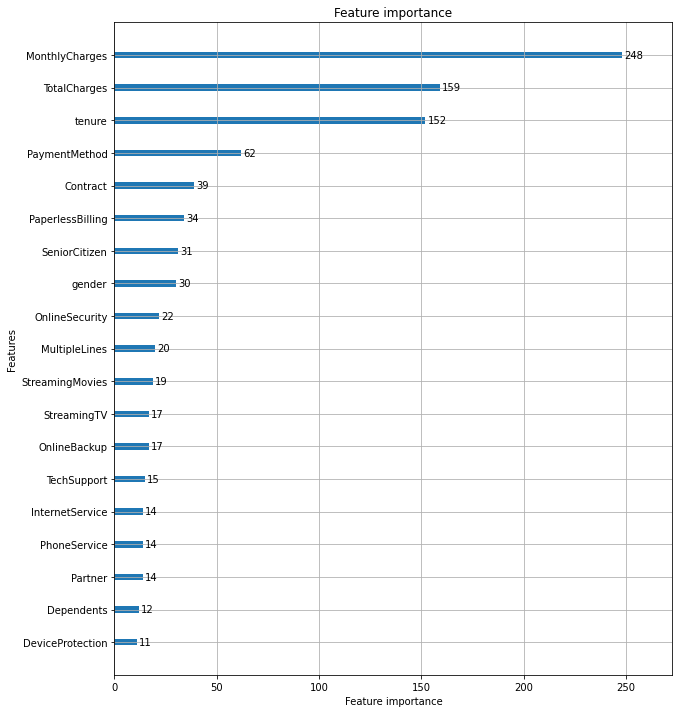

In [10]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

#요구사항
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax=ax)

#### 요구사항 6. 학습 데이터를 오버 샘플링 후 LightGBM 학습/예측/평가 수행

In [11]:
# 오버샘플링 적용
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
ftr_train_over, tgt_train_over = smote.fit_resample(ftr_train, tgt_train)


ftr_tr_over, ftr_val_over, tgt_tr_over, tgt_val_over = train_test_split(ftr_train_over, tgt_train_over, test_size=0.3, random_state=0, stratify=tgt_train_over)

In [12]:
evals_val = [(ftr_tr_over, tgt_tr_over), (ftr_val_over, tgt_val_over)]

lgbm_wrapper = LGBMClassifier(n_estimators=500)
lgbm_wrapper.fit(ftr_tr_over, tgt_tr_over, eval_metric='logloss', eval_set=evals_val, verbose=True, early_stopping_rounds=50)

lgbm_preds = lgbm_wrapper.predict(ftr_test)

get_clf_eval(tgt_test, lgbm_preds)

[1]	training's binary_logloss: 0.647796	training's binary_logloss: 0.647796	valid_1's binary_logloss: 0.649015	valid_1's binary_logloss: 0.649015
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.610205	training's binary_logloss: 0.610205	valid_1's binary_logloss: 0.612839	valid_1's binary_logloss: 0.612839
[3]	training's binary_logloss: 0.577568	training's binary_logloss: 0.577568	valid_1's binary_logloss: 0.581844	valid_1's binary_logloss: 0.581844
[4]	training's binary_logloss: 0.550524	training's binary_logloss: 0.550524	valid_1's binary_logloss: 0.556482	valid_1's binary_logloss: 0.556482
[5]	training's binary_logloss: 0.526719	training's binary_logloss: 0.526719	valid_1's binary_logloss: 0.534587	valid_1's binary_logloss: 0.534587
[6]	training's binary_logloss: 0.506475	training's binary_logloss: 0.506475	valid_1's binary_logloss: 0.516722	valid_1's binary_logloss: 0.516722
[7]	training's binary_logloss: 0.488595	training's binary_logl